In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
!pip install u8darts

In [6]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('AirPassengers.csv', delimiter=",")
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
train, val = series.split_after(pd.Timestamp('19590101'))

In [7]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

/usr/local/lib/python3.6/dist-packages/darts/models/exponential_smoothing.py:66: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



Text(0.5, 0, 'Year')

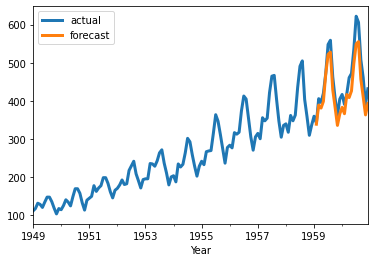

In [8]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')